# Plotting from pandas DataFrames

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<Axes: >

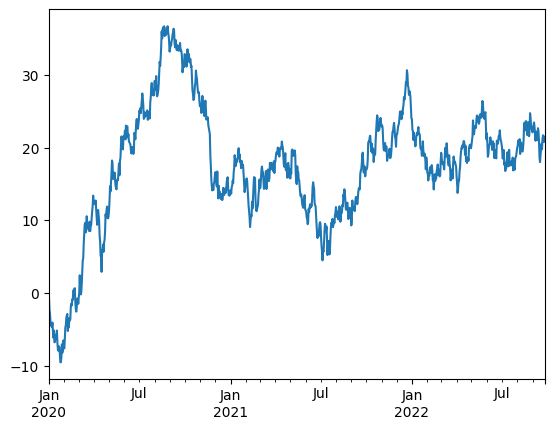

In [3]:
ts = pd.Series(np.random.randn(1000), 
               index = pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()
ts.plot()

In [4]:
# Import data
car_sales = pd.read_csv("../02-Pandas/Code/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [5]:
# Format the Price column to remove $ and .
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [6]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [7]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [8]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


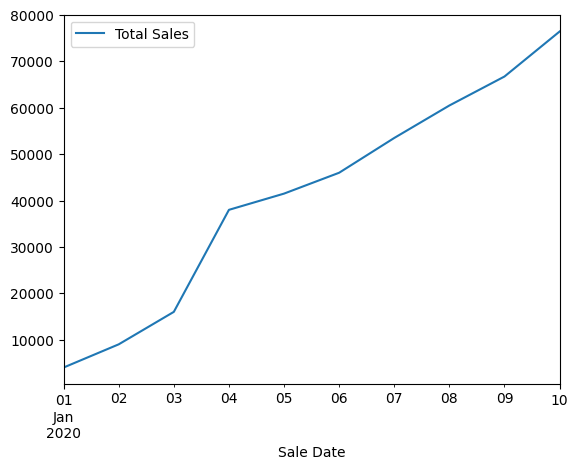

In [9]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

<Axes: xlabel='Odometer (KM)', ylabel='Price'>

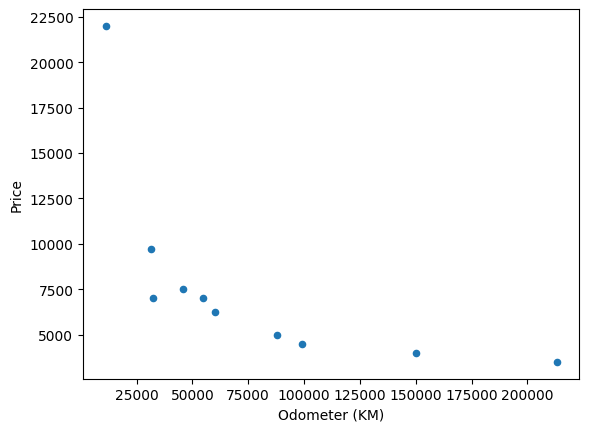

In [10]:
# Reassign Price column as int
car_sales["Price"] = car_sales["Price"].astype(int)
# Plot scatter with price column as numeric
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

In [11]:
# How about a bar graph
x = np.random.rand(10, 4)
x

# Turn it into a dataframe
df = pd.DataFrame(x, columns= ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.251804,0.868452,0.848631,0.971632
1,0.718034,0.881111,0.328538,0.054801
2,0.920022,0.536987,0.855114,0.820737
3,0.699138,0.161248,0.762687,0.738044
4,0.649954,0.036779,0.126481,0.702730
5,0.100299,0.084420,0.589095,0.868570
6,0.014260,0.111823,0.017365,0.655778
7,0.502252,0.306926,0.884059,0.545596
8,0.431107,0.554957,0.679302,0.655749
9,0.227530,0.882318,0.232368,0.954180


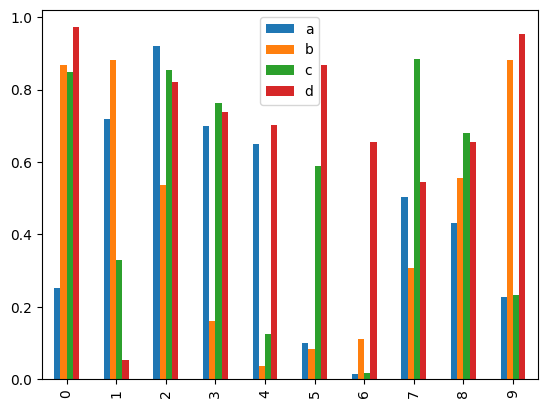

In [12]:
df.plot.bar();

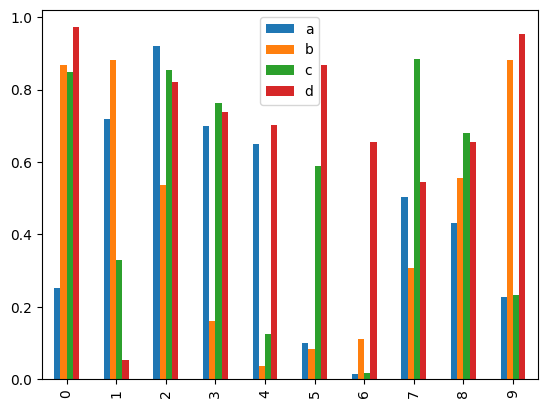

In [13]:
df.plot(kind='bar');

In [14]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


<Axes: xlabel='Make'>

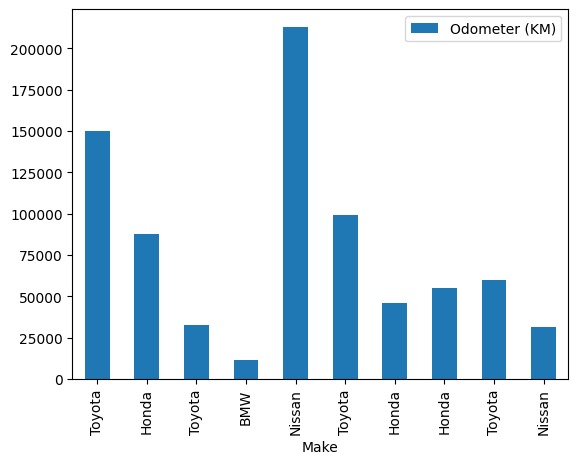

In [15]:
car_sales.plot(x="Make", y="Odometer (KM)", kind='bar')

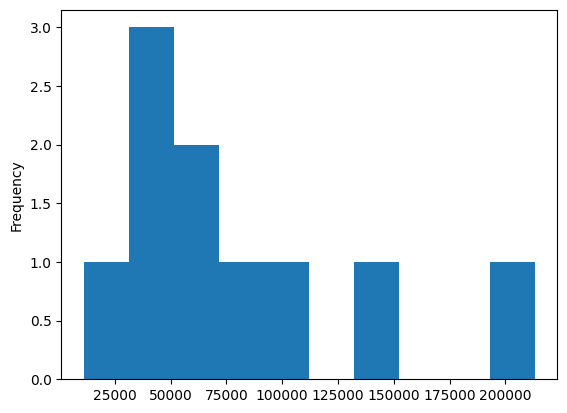

In [16]:
# How about histograms?

car_sales["Odometer (KM)"].plot.hist(bins=10);

In [17]:
# Let's try another dataset
heart_disease = pd.read_csv("../02-Pandas/Code/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


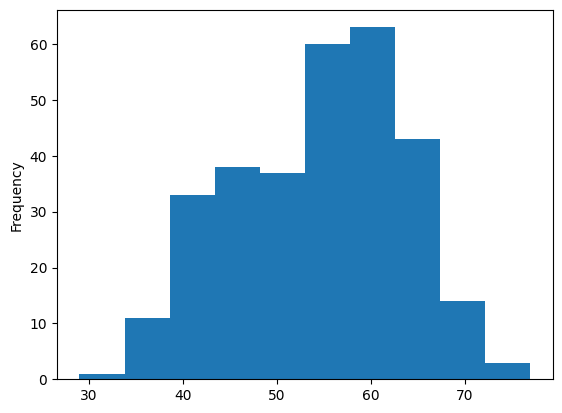

In [18]:
# Create a histogram of age
heart_disease["age"].plot.hist(bins=10);

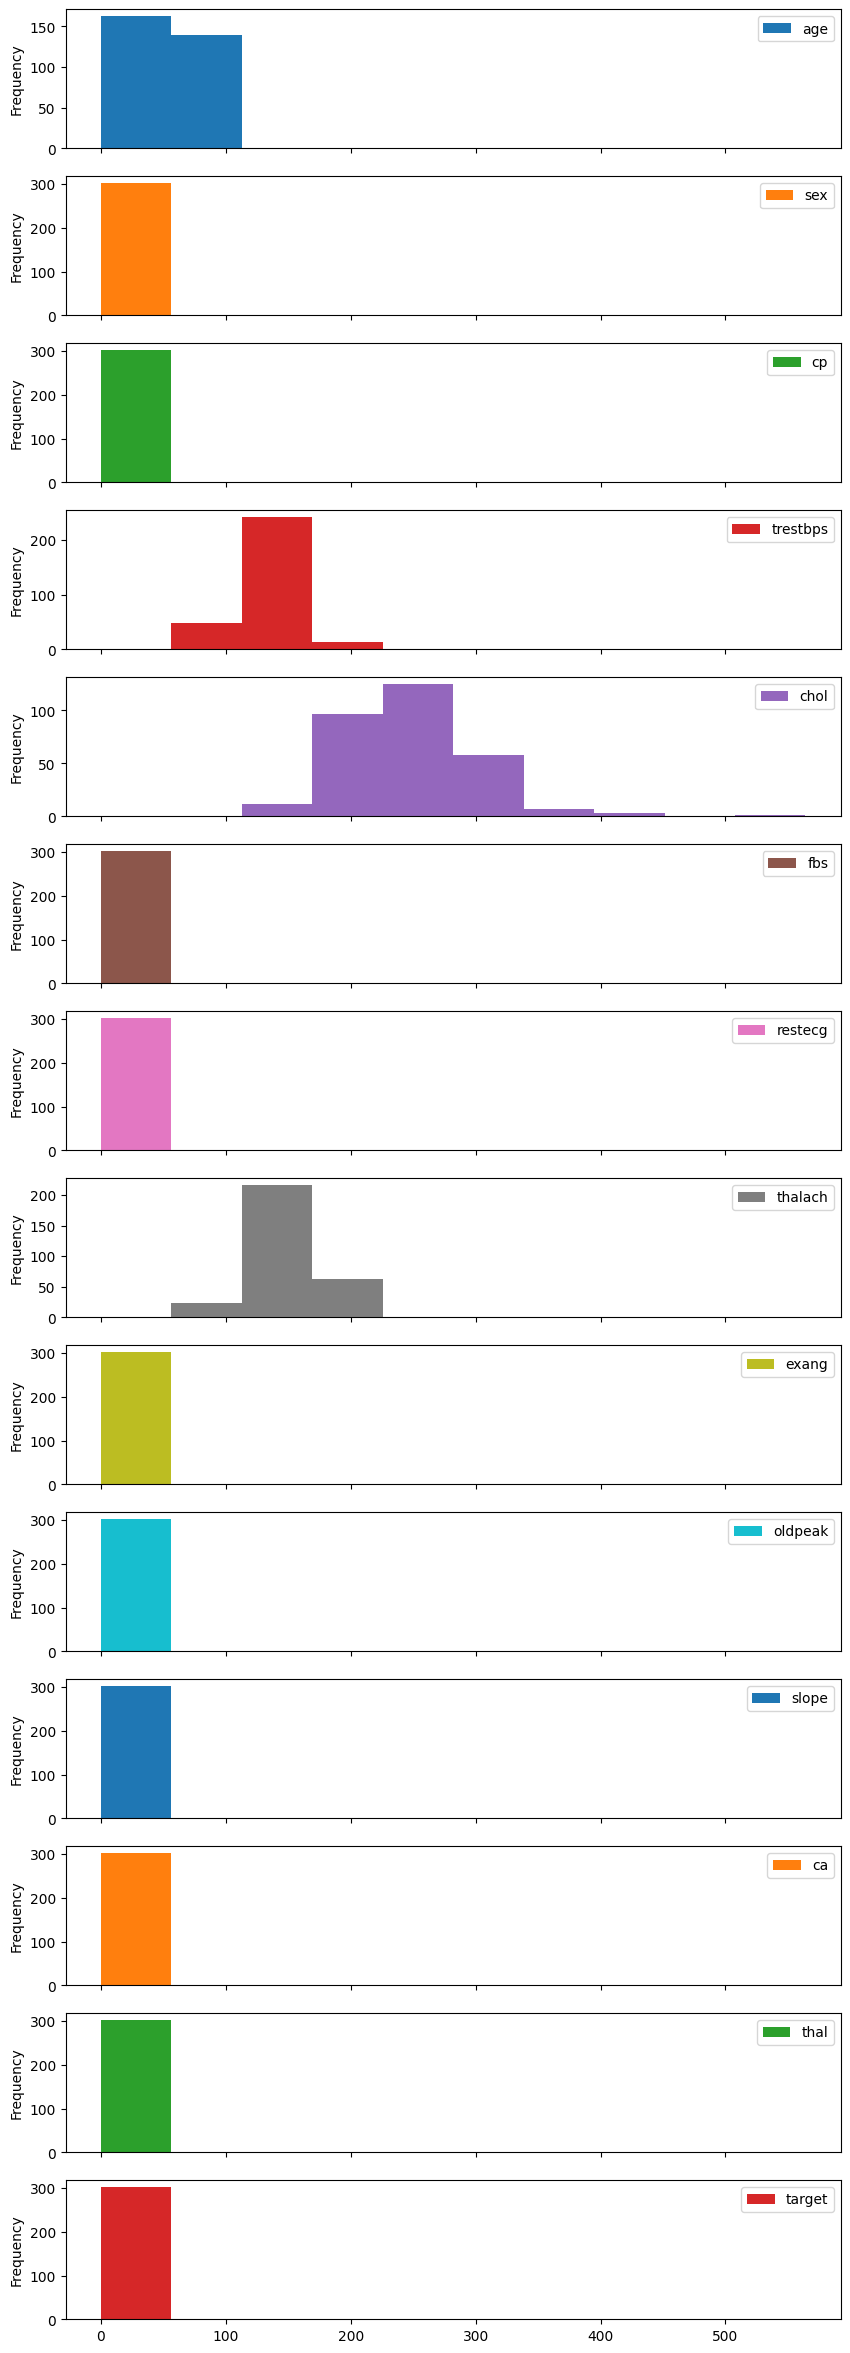

In [19]:
heart_disease.plot.hist(figsize =(10, 30),subplots=True);

### Which one should you use? (pyplot vs matplotlib OO method?)

* When plotting something quickly, okay to use the pyplot method
* When plotting something more advanced, use the OO method

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
over_50 = heart_disease[heart_disease['age'] > 50]
len(over_50)

208

In [22]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


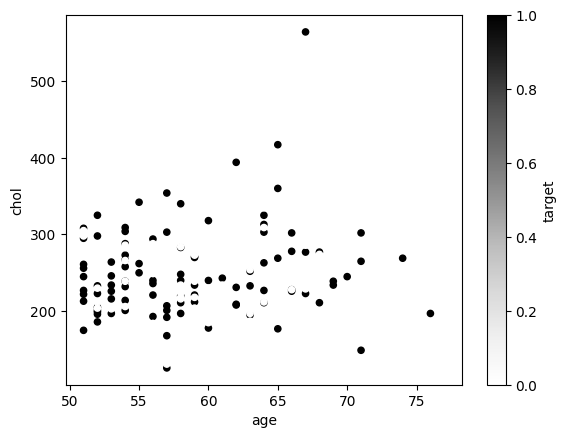

In [23]:
# Pyplot method (simple)
over_50.plot(kind='scatter',
             x = 'age',
             y='chol',
             c='target');

(45.0, 100.0)

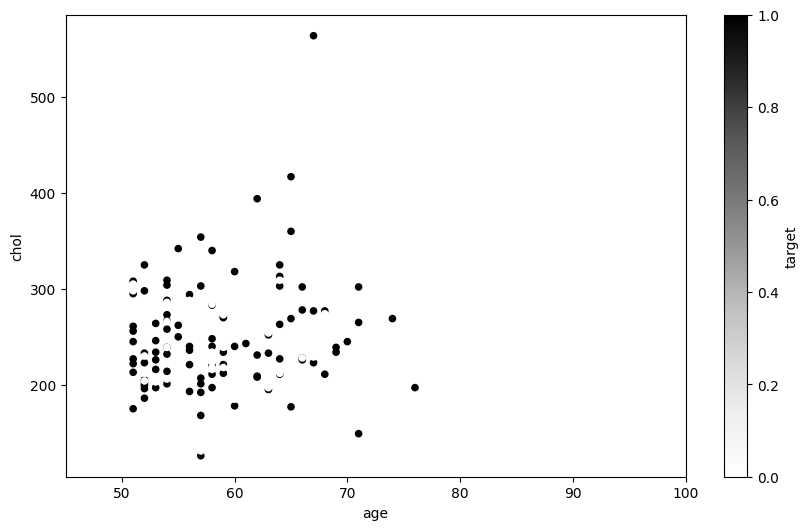

In [24]:
# OO method (advanced)
fix, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
             x = 'age',
             y = 'chol',
             c= 'target',
             ax = ax);

ax.set_xlim([45,100])

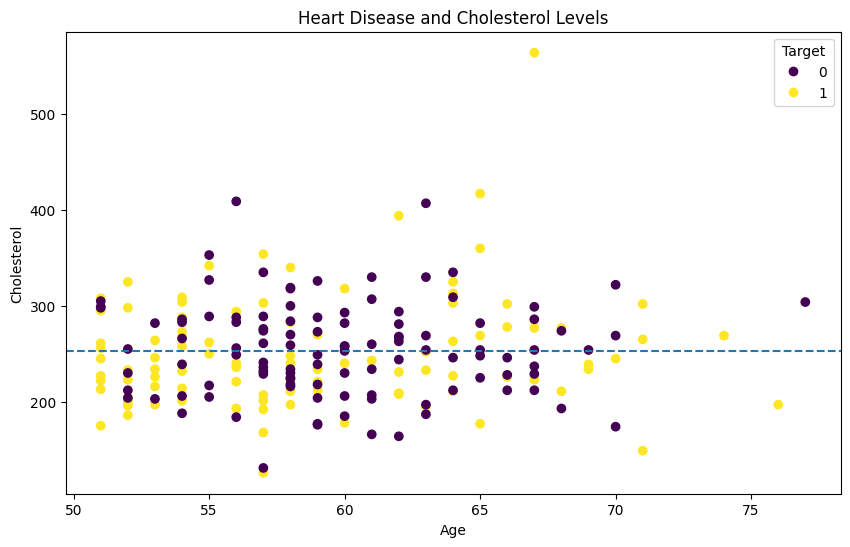

In [27]:
## OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x = over_50["age"],
                     y = over_50["chol"],
                     c = over_50["target"])

# Customize the plot
ax.set(title = "Heart Disease and Cholesterol Levels",
       xlabel = "Age",
       ylabel = "Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title = "Target")

# Add horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle = '--')

In [28]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


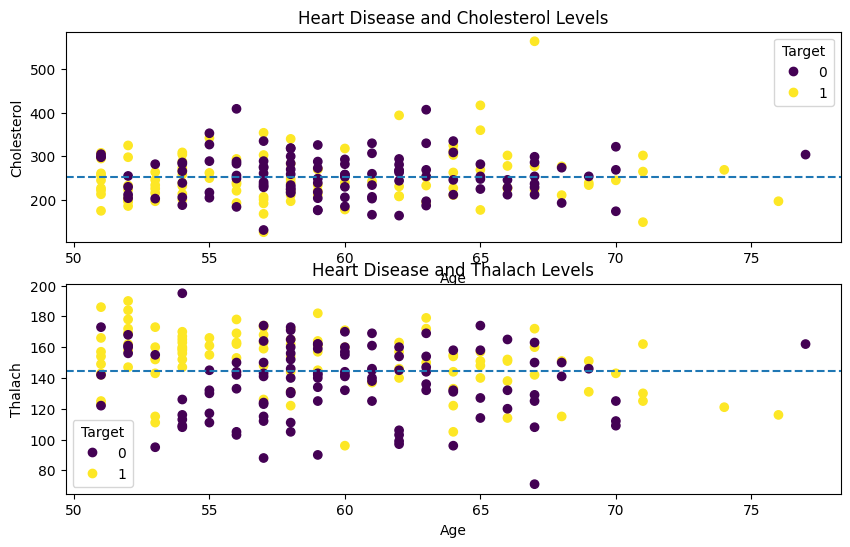

In [35]:
# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                                   ncols = 1,
                                   figsize=(10,6),
                                   sharex = True)

# Add data to ax0
scatter = ax0.scatter(x = over_50["age"],
                      y = over_50["chol"],
                      c = over_50["target"])

# Customize ax0
ax0.set(title = "Heart Disease and Cholesterol Levels",
        ylabel = "Cholesterol")

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(),
          title="Target")

# Add a meanline
ax0.axhline(over_50["chol"].mean(),
           linestyle = "--")

# Add data to ax1
scatter = ax1.scatter(x = over_50["age"],
                      y = over_50["thalach"],
                      c = over_50["target"])

# Customize ax1
ax1.set(title = "Heart Disease and Thalach Levels",
        xlabel = "Age",
        ylabel = "Thalach")

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(),
          title="Target")

# Add a meanline
ax1.axhline(over_50["thalach"].mean(),
           linestyle = "--")